# ArcGIS Python API

<br />
<img src="https://desarrollogis.maps.arcgis.com/sharing/rest/content/items/c695225d54844306a73105632b8c0839/data">
<br />


# Por dónde empezamos?

### Por la página de desarrolladores: https://developers.arcgis.com/python/ 

### Acceso directo al API en Github: https://github.com/Esri/arcgis-python-api 

### ArcGIS Python API Reference: http://esri.github.io/arcgis-python-api/apidoc/html/ 

### Para conocer más sobre conda: https://conda.io/docs/

### Para entender mejor Jupyter: https://jupyterhub.readthedocs.io/en/latest/ 

### Escribir y formatear con Markdown: https://help.github.com/articles/basic-writing-and-formatting-syntax/

<br />

# Calentamiento

Vamos a hacer un pequeño ejercicio de calentamiento basado en un notebook existente:

1. Accede a la web de desarrolladores y busca los samples: https://developers.arcgis.com/python/sample-notebooks/
1. Busca el primer ejemplo ("Your first notebook"): https://developers.arcgis.com/python/sample-notebooks/your-first-notebook/ y pincha en "Try it live" para acceder al notebook
1. Repasa la sección "Getting started with the API" y trata de usarla desde una cuenta propia

<br />

# Administrando tu Web GIS

Ahora vamos a comprobar cómo un administrador puede acceder a usuarios/roles/grupos de su organización y modificarlos a su gusto.

In [1]:
from arcgis import *
gis = GIS("https://desarrollogis.maps.arcgis.com", "expertoAdmin")

Enter password: ········


In [ ]:
# Podemos habilitar/deshabilitar usuarios
users = gis.users.search("*")
for user in users:
    if str(user["username"]) != "expertoAdmin":
        user.disable()

In [ ]:
# Podemos crear/eliminar usuarios y su contenido. También podemos reasignar contenido
newuser = gis.users.create(username = "aaaweee",
                            password = None,
                            firstname = "firstName",
                            lastname = "lastName",
                            email = "testUser@test.es",
                            role="org_publisher")

newuser

In [ ]:
newuser.delete()

In [ ]:
users = gis.users.search("*")
for user in users:
    if user.availableCredits < 25:
        print(user.firstName + user.lastName)

# Creando contenido

In [7]:
import pandas as pd

In [8]:
# Cargamos unos datos de un CSV local o externo mediante Pandas
earthquakes = pd.read_csv("https://desarrollogis.maps.arcgis.com/sharing/rest/content/items/b30add2027384ffaafc8aa4c642e074d/data")
earthquakes

,Unnamed: 0,X,Y,ProgramName,ProjectTitle,DamageExtent,ID
0,0,-118.213772,34.032372,Municipal Facilities R and P,Boyle Heights Sports Center,95,35
1,1,-118.245915,34.045172,Municipal Facilities R and P,Engine Company 23 Arts Center,76,20565
2,2,-118.245911,34.045161,Municipal Facilities R and P,Engine Company 23 Arts Center,76,20566
3,3,-118.407213,34.235234,Bridge Improvement Program,Laurel Canyon Blvd Bridge-1233,78,771
4,4,-118.317632,34.025554,Wastewater - CSP,Wilshire Area System Swr Rehab,58,768
5,5,-118.432091,33.928674,Wastewater - TPP,HWRP- IPS Odor Control Improvements,62,180
6,6,-118.479765,34.181202,Wastewater - TPP,DCT- Backup Power,55,285
7,7,-118.405540,34.144947,Municipal Facilities R and P,Los Angeles Riverfront Park Phase II,90,109
8,8,-118.261960,33.744299,Wastewater - TPP,TIWRP- Aeration System Replacement,97,274
9,9,-118.615010,34.257942,Municipal Facilities R and P,Chatsworth Park South - Park Improvements,88,117


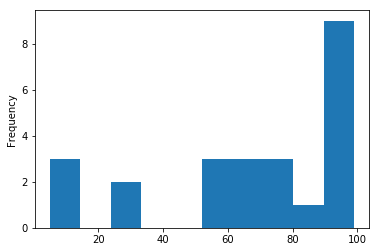

In [47]:
earthquakes["DamageExtent"].plot(kind="hist")

In [23]:
map = gis.map('Los Angeles')
map

Geocoder does not support single line address input


In [24]:
# Importamos como capa estos datos (la relación API-Pandas es muy fluida)
featureLayer = gis.content.import_data(earthquakes)

In [25]:
map.add_layer(featureLayer)

In [ ]:
import json

# Ya que tenemos la información en momoria, la podemos ajustar para salvarla en nuestro Web GIS
item_properties = {
    "title": "Terremotoso LA",
    "tags" : "terremotos,LA",
    "description": "terremotos en LA",
    "text": json.dumps({"featureCollection": {"layers": [dict(featureLayer.layer)]}}),
    "type": "Feature Collection",
    "typeKeywords": "Data, Feature Collection, Singlelayer"
}

item = gis.content.add(item_properties)
item

# Análisis espacial

In [26]:
import arcgis.network as network

In [27]:
# Este servicio es configurable y podemos usar el nuestro propio en ArcGIS Enterprise
service_area_url = gis.properties.helperServices.serviceArea.url
service_area_url

'https://route.arcgis.com/arcgis/rest/services/World/ServiceAreas/NAServer/ServiceArea_World'

In [28]:
# Obtenemos el servicio service área
sa_layer = network.ServiceAreaLayer(service_area_url, gis=gis)

In [29]:
# De nuestra capa de terremotos cogemos las features haciendo un query (1=1) y calculamos 3 saltos drive-time
result = sa_layer.solve_service_area(featureLayer.query(),default_breaks=[5,10,15])

In [30]:
# Revisamos el resultado
result.keys()

dict_keys(['messages', 'saPolygons'])

In [31]:
# Vemos que hay polígonos que contienen geometrías
result['saPolygons'].keys()

dict_keys(['fieldAliases', 'geometryType', 'spatialReference', 'features'])

In [32]:
from arcgis.features import Feature, FeatureSet

# Creamos una lista con los polígonos que incluye el resultado del service área
poly_feat_list = []
for polygon_dict in result['saPolygons']['features']:
    f1 = Feature(polygon_dict['geometry'], polygon_dict['attributes'])
    poly_feat_list.append(f1)

In [33]:
# Esa lista la convertimos en un FeatureSet para mayor comodidad
service_area_fset = FeatureSet(poly_feat_list, 
                         geometry_type=result['saPolygons']['geometryType'],
                         spatial_reference= result['saPolygons']['spatialReference'])

In [34]:
# Usamos 3 colores, el más próximo al epicentro será rojo y el más alejado verde
colors = {5: [255, 0, 0, 90], 
          10: [255, 255, 0, 90], 
          15: [0, 128, 0, 90]}

fill_symbol = {"type": "esriSFS","style": "esriSFSSolid", "color": [115,76,0,255]}

In [35]:
# Para cada polígono resultado de nuestro FeatureSet lo pintamos según corresponda (5, 10 o 15)
for service_area in service_area_fset.features:
    
    #set color based on drive time
    fill_symbol['color'] = colors[service_area.attributes['ToBreak']]
       
    map.draw(service_area.geometry, symbol=fill_symbol)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
